In [ ]:
import pandas as pd

master_data = pd.read_csv('ios(1).csv',sep=',', encoding='latin-1')
print('data shape: ', master_data.shape)
master_data.head()



data shape:  (143, 56)


,ios version,MMS_sending,Battery,phone_freez_crash,app compatibility,syncing,bluetooth,app crash,slow performence,security_vulnerabilities,...,auto_correct,notification,apple_pay,icloud,charging_issue,face_id,voicemail,home_pod,ios_version,total_bugs
0,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,8
1,3.1,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.10,6
2,3.1.2,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.12,4
3,3.1.3,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.13,6
4,3.2,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.20,5


In [ ]:
master_data.isnull().sum()

ios version                   0
MMS_sending                 140
Battery                      79
phone_freez_crash           142
app compatibility           136
syncing                     138
bluetooth                    96
app crash                   100
slow performence            131
security_vulnerabilities    140
Wifi                         82
sensor                      139
ringing                     142
vibration                   142
audio_playback              135
display_issues              135
email_app                   134
game_center                 142
air_play                    140
air_print                   142
safari                      137
home_sharing                141
presonal_hotspot            142
location_tracking           142
face_time                   139
iBooks                      142
siri                        140
sim_card                    141
mobile_network              133
keyboard                    135
maps                        142
pasbook_

In [ ]:
mydataset_without_null = master_data.fillna(0)
print(mydataset_without_null.isnull().sum())

ios version                 0
MMS_sending                 0
Battery                     0
phone_freez_crash           0
app compatibility           0
syncing                     0
bluetooth                   0
app crash                   0
slow performence            0
security_vulnerabilities    0
Wifi                        0
sensor                      0
ringing                     0
vibration                   0
audio_playback              0
display_issues              0
email_app                   0
game_center                 0
air_play                    0
air_print                   0
safari                      0
home_sharing                0
presonal_hotspot            0
location_tracking           0
face_time                   0
iBooks                      0
siri                        0
sim_card                    0
mobile_network              0
keyboard                    0
maps                        0
pasbook_app                 0
lock_screen                 0
imessage  

In [ ]:
mydataset_without_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ios version               143 non-null    object 
 1   MMS_sending               143 non-null    float64
 2   Battery                   143 non-null    float64
 3   phone_freez_crash         143 non-null    float64
 4   app compatibility         143 non-null    float64
 5   syncing                   143 non-null    float64
 6   bluetooth                 143 non-null    float64
 7   app crash                 143 non-null    float64
 8   slow performence          143 non-null    float64
 9   security_vulnerabilities  143 non-null    float64
 10  Wifi                      143 non-null    float64
 11  sensor                    143 non-null    float64
 12  ringing                   143 non-null    float64
 13  vibration                 143 non-null    float64
 14  audio_play

In [ ]:
data_copy = mydataset_without_null.drop(['ios version'], axis=1)
#data_copy = data_copy.drop(['total_bugs'], axis=1)


In [ ]:
print(data_copy)

     MMS_sending  Battery  phone_freez_crash  app compatibility  syncing  \
0            1.0      1.0                1.0                1.0      1.0   
1            1.0      1.0                0.0                0.0      1.0   
2            1.0      1.0                0.0                0.0      1.0   
3            0.0      1.0                0.0                0.0      1.0   
4            0.0      1.0                0.0                0.0      0.0   
..           ...      ...                ...                ...      ...   
138          0.0      1.0                0.0                0.0      0.0   
139          0.0      0.0                0.0                0.0      0.0   
140          0.0      1.0                0.0                0.0      0.0   
141          0.0      0.0                0.0                0.0      0.0   
142          0.0      0.0                0.0                0.0      0.0   

     bluetooth  app crash  slow performence  security_vulnerabilities  Wifi  \
0       

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split


In [ ]:
var_holder = {}
x_test_holder = {}
y_test_holder = {}
x_train_holder = {}
y_train_holder = {}


def training(i):


    print(i)
    y=data_copy[i].values
    x=data_copy['ios_version'].values
    x=x.reshape(-1,1)
    x_train_holder['train_x_of_' + str(i)], x_test_holder['test_x_of_' + str(i)], y_train_holder['train_y_of_' + str(i)], y_test_holder['test_y_of_' + str(i)] = train_test_split(x, y, test_size=0.2, shuffle=True)
    var_holder['trained_model_of_' + str(i)] = GradientBoostingClassifier(n_estimators=100, learning_rate=2,max_depth=1, random_state=42).fit(x_train_holder.get('train_x_of_' + str(i)), y_train_holder.get('train_y_of_' + str(i)))

for i in data_copy.columns:
  if i == 'ios_version':
    break

  training(i)

locals().update(var_holder)


MMS_sending
Battery
phone_freez_crash
app compatibility
syncing
bluetooth
app crash
slow performence
security_vulnerabilities
Wifi
sensor
ringing
vibration
audio_playback
display_issues
email_app
game_center
air_play
air_print
safari
home_sharing
presonal_hotspot
location_tracking
face_time
iBooks
siri
sim_card
mobile_network
keyboard
maps
pasbook_app
lock_screen
imessage
call_audio
phone_restart
touch_id
app_store
music_app
camera
health_app
activation_issue
night_shift


ValueError: ignored

In [ ]:

var_holder = {}
x_test_holder = {}
y_test_holder = {}
x_train_holder = {}
y_train_holder = {}


def training(i):

  try:
    print(i)
    y=data_copy[i].values
    x=data_copy['ios_version'].values
    x=x.reshape(-1,1)
    x_train_holder['train_x_of_' + str(i)], x_test_holder['test_x_of_' + str(i)], y_train_holder['train_y_of_' + str(i)], y_test_holder['test_y_of_' + str(i)] = train_test_split(x, y, test_size=0.2, shuffle=True)
    var_holder['trained_model_of_' + str(i)] = GradientBoostingClassifier(n_estimators=100, learning_rate=2,max_depth=1, random_state=42).fit(x_train_holder.get('train_x_of_' + str(i)), y_train_holder.get('train_y_of_' + str(i)))

  except:
    print('error___________________________________________',i)
    training(i)

for i in data_copy.columns:
  if i == 'ios_version':
    break

  training(i)

locals().update(var_holder)




MMS_sending
Battery
phone_freez_crash
app compatibility
syncing
bluetooth
app crash
slow performence
security_vulnerabilities
Wifi
sensor
ringing
vibration
audio_playback
display_issues
email_app
game_center
air_play
air_print
error___________________________________________ air_print
air_print
error___________________________________________ air_print
air_print
safari
home_sharing
presonal_hotspot
error___________________________________________ presonal_hotspot
presonal_hotspot
error___________________________________________ presonal_hotspot
presonal_hotspot
location_tracking
face_time
iBooks
siri
sim_card
mobile_network
keyboard
maps
error___________________________________________ maps
maps
pasbook_app
error___________________________________________ pasbook_app
pasbook_app
lock_screen
imessage
call_audio
phone_restart
touch_id
app_store
music_app
error___________________________________________ music_app
music_app
camera
health_app
activation_issue
night_shift
error______________

In [ ]:
var_holder.keys()

dict_keys(['trained_model_of_MMS_sending', 'trained_model_of_Battery', 'trained_model_of_phone_freez_crash', 'trained_model_of_app compatibility', 'trained_model_of_syncing', 'trained_model_of_bluetooth', 'trained_model_of_app crash', 'trained_model_of_slow performence', 'trained_model_of_security_vulnerabilities', 'trained_model_of_Wifi', 'trained_model_of_sensor', 'trained_model_of_ringing', 'trained_model_of_vibration', 'trained_model_of_audio_playback', 'trained_model_of_display_issues', 'trained_model_of_email_app', 'trained_model_of_game_center', 'trained_model_of_air_play', 'trained_model_of_air_print', 'trained_model_of_safari', 'trained_model_of_home_sharing', 'trained_model_of_presonal_hotspot', 'trained_model_of_location_tracking', 'trained_model_of_face_time', 'trained_model_of_iBooks', 'trained_model_of_siri', 'trained_model_of_sim_card', 'trained_model_of_mobile_network', 'trained_model_of_keyboard', 'trained_model_of_maps', 'trained_model_of_pasbook_app', 'trained_model_

In [ ]:
x_train_holder.keys()

dict_keys(['train_x_of_MMS_sending', 'train_x_of_Battery', 'train_x_of_phone_freez_crash', 'train_x_of_app compatibility', 'train_x_of_syncing', 'train_x_of_bluetooth', 'train_x_of_app crash', 'train_x_of_slow performence', 'train_x_of_security_vulnerabilities', 'train_x_of_Wifi', 'train_x_of_sensor', 'train_x_of_ringing', 'train_x_of_vibration', 'train_x_of_audio_playback', 'train_x_of_display_issues', 'train_x_of_email_app', 'train_x_of_game_center', 'train_x_of_air_play', 'train_x_of_air_print', 'train_x_of_safari', 'train_x_of_home_sharing', 'train_x_of_presonal_hotspot', 'train_x_of_location_tracking', 'train_x_of_face_time', 'train_x_of_iBooks', 'train_x_of_siri', 'train_x_of_sim_card', 'train_x_of_mobile_network', 'train_x_of_keyboard', 'train_x_of_maps', 'train_x_of_pasbook_app', 'train_x_of_lock_screen', 'train_x_of_imessage', 'train_x_of_call_audio', 'train_x_of_phone_restart', 'train_x_of_touch_id', 'train_x_of_app_store', 'train_x_of_music_app', 'train_x_of_camera', 'train_

In [ ]:
x_test_holder.keys()

dict_keys(['test_x_of_MMS_sending', 'test_x_of_Battery', 'test_x_of_phone_freez_crash', 'test_x_of_app compatibility', 'test_x_of_syncing', 'test_x_of_bluetooth', 'test_x_of_app crash', 'test_x_of_slow performence', 'test_x_of_security_vulnerabilities', 'test_x_of_Wifi', 'test_x_of_sensor', 'test_x_of_ringing', 'test_x_of_vibration', 'test_x_of_audio_playback', 'test_x_of_display_issues', 'test_x_of_email_app', 'test_x_of_game_center', 'test_x_of_air_play', 'test_x_of_air_print', 'test_x_of_safari', 'test_x_of_home_sharing', 'test_x_of_presonal_hotspot', 'test_x_of_location_tracking', 'test_x_of_face_time', 'test_x_of_iBooks', 'test_x_of_siri', 'test_x_of_sim_card', 'test_x_of_mobile_network', 'test_x_of_keyboard', 'test_x_of_maps', 'test_x_of_pasbook_app', 'test_x_of_lock_screen', 'test_x_of_imessage', 'test_x_of_call_audio', 'test_x_of_phone_restart', 'test_x_of_touch_id', 'test_x_of_app_store', 'test_x_of_music_app', 'test_x_of_camera', 'test_x_of_health_app', 'test_x_of_activation_

In [ ]:
y_test_holder.keys()

dict_keys(['test_y_of_MMS_sending', 'test_y_of_Battery', 'test_y_of_phone_freez_crash', 'test_y_of_app compatibility', 'test_y_of_syncing', 'test_y_of_bluetooth', 'test_y_of_app crash', 'test_y_of_slow performence', 'test_y_of_security_vulnerabilities', 'test_y_of_Wifi', 'test_y_of_sensor', 'test_y_of_ringing', 'test_y_of_vibration', 'test_y_of_audio_playback', 'test_y_of_display_issues', 'test_y_of_email_app', 'test_y_of_game_center', 'test_y_of_air_play', 'test_y_of_air_print', 'test_y_of_safari', 'test_y_of_home_sharing', 'test_y_of_presonal_hotspot', 'test_y_of_location_tracking', 'test_y_of_face_time', 'test_y_of_iBooks', 'test_y_of_siri', 'test_y_of_sim_card', 'test_y_of_mobile_network', 'test_y_of_keyboard', 'test_y_of_maps', 'test_y_of_pasbook_app', 'test_y_of_lock_screen', 'test_y_of_imessage', 'test_y_of_call_audio', 'test_y_of_phone_restart', 'test_y_of_touch_id', 'test_y_of_app_store', 'test_y_of_music_app', 'test_y_of_camera', 'test_y_of_health_app', 'test_y_of_activation_

In [ ]:
y_train_holder.keys()

dict_keys(['train_y_of_MMS_sending', 'train_y_of_Battery', 'train_y_of_phone_freez_crash', 'train_y_of_app compatibility', 'train_y_of_syncing', 'train_y_of_bluetooth', 'train_y_of_app crash', 'train_y_of_slow performence', 'train_y_of_security_vulnerabilities', 'train_y_of_Wifi', 'train_y_of_sensor', 'train_y_of_ringing', 'train_y_of_vibration', 'train_y_of_audio_playback', 'train_y_of_display_issues', 'train_y_of_email_app', 'train_y_of_game_center', 'train_y_of_air_play', 'train_y_of_air_print', 'train_y_of_safari', 'train_y_of_home_sharing', 'train_y_of_presonal_hotspot', 'train_y_of_location_tracking', 'train_y_of_face_time', 'train_y_of_iBooks', 'train_y_of_siri', 'train_y_of_sim_card', 'train_y_of_mobile_network', 'train_y_of_keyboard', 'train_y_of_maps', 'train_y_of_pasbook_app', 'train_y_of_lock_screen', 'train_y_of_imessage', 'train_y_of_call_audio', 'train_y_of_phone_restart', 'train_y_of_touch_id', 'train_y_of_app_store', 'train_y_of_music_app', 'train_y_of_camera', 'train_

In [ ]:
from sklearn.metrics import accuracy_score

def accu(name_of_model,x_test_for_pre,y_test_for_pre):
  pred = var_holder.get(name_of_model).predict(x_test_holder.get(x_test_for_pre))
  print(pred)
  print("Accuracy Score: ",accuracy_score(y_test_holder.get(y_test_for_pre),pred))


In [ ]:
for bla in data_copy.columns:
  if bla == 'ios_version':
    break
  name_of_model= 'trained_model_of_'+str(bla)
  x_test_for_pre= 'test_x_of_'+str(bla)
  y_test_for_pre= 'test_y_of_'+str(bla)
  accu(name_of_model,x_test_for_pre,y_test_for_pre)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0.]
Accuracy Score:  1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
Accuracy Score:  0.5172413793103449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Accuracy Score:  1.0
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Accuracy Score:  0.9310344827586207
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Accuracy Score:  1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
Accuracy Score:  0.3448275862068966
[0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 0.]
Accuracy Score:  0.6551724137931034
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Accuracy Score:  0.8275862068965517
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
pred_data = pd.read_csv('pred_test.csv',sep=',', encoding='latin-1')

df = pred_data.drop(['ios version'], axis=1)
df

,MMS_sending,Battery,phone_freez_crash,app compatibility,syncing,bluetooth,app crash,slow performence,security_vulnerabilities,Wifi,...,haptic_feedback,auto_correct,notification,apple_pay,icloud,charging_issue,face_id,voicemail,home_pod,ios_version
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144


In [ ]:
matrix_list=[]
def fp(name_of_model,f_x):
  pred = var_holder.get(name_of_model).predict(f_x)
  print(pred)
  global matrix_list
  matrix_list.append(pred.item())
  print('(---------------------------------------------------------------------------------------)')

In [ ]:
f_x=df['ios_version'].values
f_x=f_x.reshape(-1,1)
for blaa in df.columns:
  if blaa == 'ios_version':
    break

  name_of_model= 'trained_model_of_'+str(blaa)
  print(blaa)
  fp(name_of_model,f_x)


MMS_sending
[0.]
(---------------------------------------------------------------------------------------)
Battery
[1.]
(---------------------------------------------------------------------------------------)
phone_freez_crash
[0.]
(---------------------------------------------------------------------------------------)
app compatibility
[0.]
(---------------------------------------------------------------------------------------)
syncing
[0.]
(---------------------------------------------------------------------------------------)
bluetooth
[1.]
(---------------------------------------------------------------------------------------)
app crash
[0.]
(---------------------------------------------------------------------------------------)
slow performence
[0.]
(---------------------------------------------------------------------------------------)
security_vulnerabilities
[0.]
(---------------------------------------------------------------------------------------)
Wifi
[1.]
(--------

In [ ]:
print(matrix_list)

[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
actual_list = [0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0]

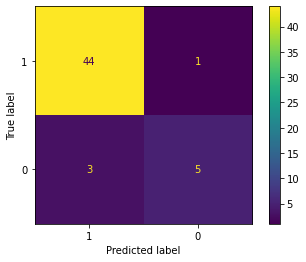

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(actual_list, matrix_list)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['1','0'])
cm_display.plot()
plt.show()